In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Analisis exploratiorio de la data:
Se incluyo las 3 tablas de producto, demographic info y transacciones.

Se desplego el head de cada tabla por propositos ilustrativos.

In [78]:
product_df = pd.read_csv("product.csv")
transaction_df = pd.read_csv("transaction.csv")
demographics_df = pd.read_csv("demographic.csv")

print(" PRODUCT HEAD: ")
print(product_df.head(),"\n")

print(" TRANSACTIONS HEAD: ")
print(transaction_df.head(), '\n')

print(" DEMOGRAPHICS HEAD: ")
print(demographics_df.head(), "\n")


 PRODUCT HEAD: 
   PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC
0       25671             2       GROCERY  National                  FRZN ICE
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION
2       26093            69        PASTRY   Private                     BREAD
3       26190            69       GROCERY   Private      FRUIT - SHELF STABLE
4       26355            69       GROCERY   Private             COOKIES/CONES 

 TRANSACTIONS HEAD: 
   household_key    BASKET_ID  PRODUCT_ID  QUANTITY  SALES_VALUE  STORE_ID  \
0           2375  26984851472     1004906         1         1.39       364   
1           2375  26984851472     1033142         1         0.82       364   
2           2375  26984851472     1036325         1         0.99       364   
3           2375  26984851472     1082185         1         1.21       364   
4           2375  26984851472     8160430         1         1.50       364   

   WEEK_NO  
0        1 

## Analísis sobre categorias de producto
Respecto a la pregunta referente al README.rd:  ¿Qué categorías de productos generan aproximadamente el 80% de las ventas?


In [79]:
# Creacion d eun data frame temporal para mantener una conbinacion de las tablas de producto y de transacciones.
prod_cath_df = pd.merge(product_df, transaction_df)
prod_cath_df.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,household_key,BASKET_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO
0,25671,2,GROCERY,National,FRZN ICE,1228,29046618323,1,3.49,3313,23
1,25671,2,GROCERY,National,FRZN ICE,358,30707611686,1,3.49,3266,36
2,25671,2,GROCERY,National,FRZN ICE,325,33046710871,4,13.96,3191,59
3,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,1675,30760265177,1,0.99,3235,36
4,26093,69,PASTRY,Private,BREAD,1032,33783848749,1,1.59,33904,66


In [94]:
# Proceso de ETL para oder conseguir una relacion entre tipo de producto y revenue
df = pd.DataFrame(prod_cath_df.groupby("COMMODITY_DESC", as_index=False).sum())
df.head()

,COMMODITY_DESC,PRODUCT_ID,MANUFACTURER,household_key,BASKET_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO
0,,46842857720,7839,10130246,270580399841203,0,0.00,25923914,464252
1,(CORP USE ONLY),70466394,270816,77929,2060624297731,76,283.40,162695,3290
2,ADULT INCONTINENCE,1328626342,296002,703094,19085440078482,638,4995.97,2411584,32903
3,AIR CARE,37003290763,5195461,7123754,189521292529018,6861,17699.31,18357290,312025
4,ANALGESICS,14461249895,13899880,5979802,164995403227029,5528,25426.21,15363038,283240


In [95]:
# eliminar columnas innecesarias
df.drop(['STORE_ID', 'PRODUCT_ID', 'MANUFACTURER', 'household_key', 'BASKET_ID', 'STORE_ID', 'WEEK_NO'], axis='columns', inplace=True)
df.head()

,COMMODITY_DESC,QUANTITY,SALES_VALUE
0,,0,0.00
1,(CORP USE ONLY),76,283.40
2,ADULT INCONTINENCE,638,4995.97
3,AIR CARE,6861,17699.31
4,ANALGESICS,5528,25426.21


In [96]:
# definicion del total del valor de ventas
print("The total revenue for the 2 years including all clients is: $" + str(df['SALES_VALUE'].sum()))

The total revenue for the 2 years including all clients is: $8057463.08000024


In [97]:
# definicion del 80% de las ventas en valor neto
print("80% of the revenue should mean: $" + str(df['SALES_VALUE'].sum() * 0.8))

80% of the revenue should mean: $6445970.4640001925


In [98]:
# investigacion de la data
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COMMODITY_DESC  308 non-null    object 
 1   QUANTITY        308 non-null    int64  
 2   SALES_VALUE     308 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ KB


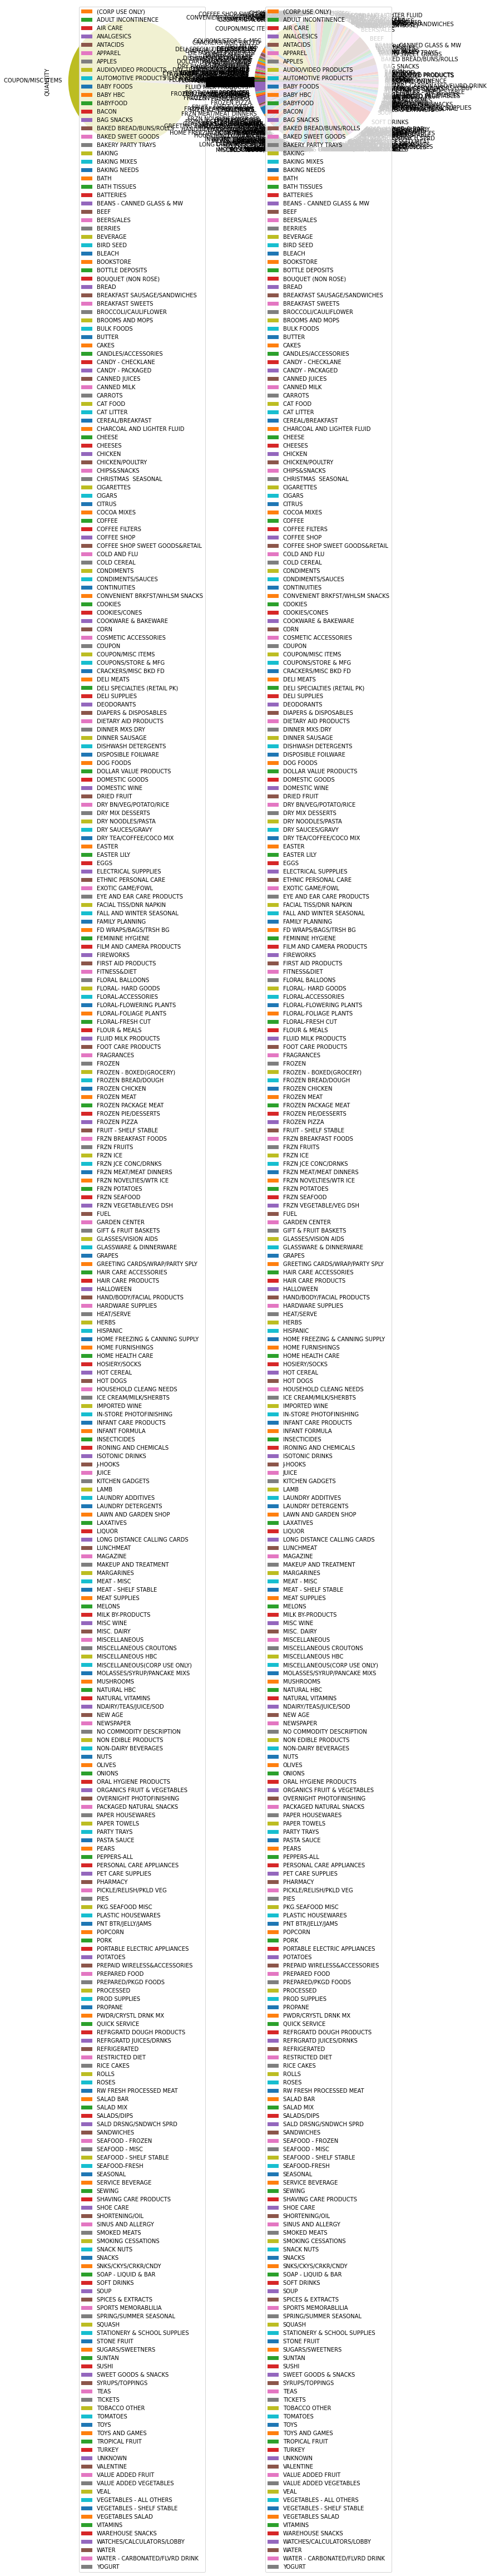

In [26]:
plot = df.plot.pie(subplots=True, figsize=(11, 6))

In [99]:
# creacion de data frame referente a la cantidad y revenue de cada categoria
df.sort_values(by=['SALES_VALUE'], ascending=False, inplace=True)
df.head()

,COMMODITY_DESC,QUANTITY,SALES_VALUE
78,COUPON/MISC ITEMS,257218037,639878.56
273,SOFT DRINKS,160637,327647.30
25,BEEF,65576,312103.22
124,FLUID MILK PRODUCTS,116192,205356.05
52,CHEESE,96402,189528.18


In [100]:
df.head()

,COMMODITY_DESC,QUANTITY,SALES_VALUE
78,COUPON/MISC ITEMS,257218037,639878.56
273,SOFT DRINKS,160637,327647.30
25,BEEF,65576,312103.22
124,FLUID MILK PRODUCTS,116192,205356.05
52,CHEESE,96402,189528.18


### Analisis de Pareto

Un diagrama de Pareto es una técnica que permite clasificar gráficamente la información de mayor a menor relevancia, con el objetivo de reconocer los problemas más importantes en los que deberías enfocarte y solucionarlos.

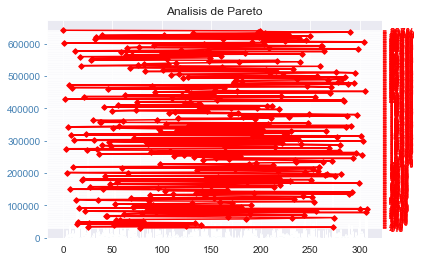

In [102]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['SALES_VALUE'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['COMMODITY_DESC'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.title('Analisis de Pareto')
#display Pareto chart
plt.show()

### Investigacion estadistica para reponder la pregunta
En la siguiente parte se hizo un filtro de el data frame para ponerlko en orden descendente.

Para esto se empeze a analizar grupos de datos por monto relacionado hasta encontrar una suma que refleje el 80% de las ventas.

In [107]:
df_test = df
df_test = df_test.loc[df_test['SALES_VALUE'] > 9999.00, ['SALES_VALUE']]
df_test

,SALES_VALUE
78,639878.56
273,327647.30
25,312103.22
124,205356.05
52,189528.18
...,...
207,10678.69
104,10534.93
248,10401.59
38,10249.79


In [108]:
# First sum of the value in the data frame
df_test.sum()

SALES_VALUE    7616859.75
dtype: float64

In [109]:
df_test_x = df_test.loc[df_test['SALES_VALUE'] > 50000.00, ['SALES_VALUE']]


In [110]:
df_test_x

,SALES_VALUE
78,639878.56
273,327647.30
25,312103.22
124,205356.05
52,189528.18
140,160517.17
14,148375.16
26,147344.45
134,146037.25
15,145930.85


In [33]:
# Next sum of the values
df_test_x.sum()

SALES_VALUE    4506812.39
dtype: float64

In [111]:
df_test_a = df_test.loc[df_test['SALES_VALUE'] > 24000.00, ['SALES_VALUE']]

In [35]:
# Next sum of the values
df_test_a.sum()

SALES_VALUE    6456193.71
dtype: float64

In [112]:
df_test_a

,SALES_VALUE
78,639878.56
273,327647.30
25,312103.22
124,205356.05
52,189528.18
...,...
174,24753.33
253,24600.99
60,24527.90
259,24335.56


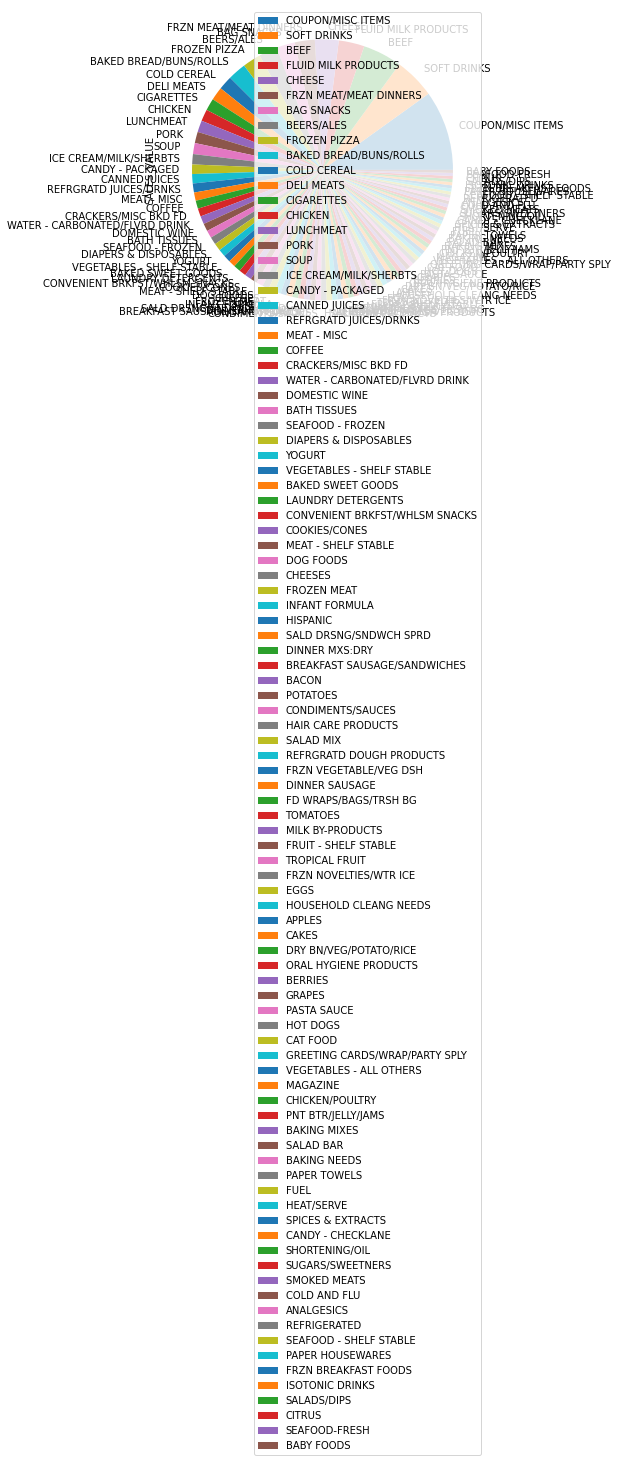

In [37]:
plot2 = df_test_a.plot.pie(subplots=True, figsize=(11, 6))

In [38]:
# Numero de categorias que representan el 80% de las ventas
df_test_a.count()

SALES_VALUE    96
dtype: int64

In [39]:
print("The percentage of revenue counting the top 96 categories is:")
print((str(round(df_test_a['SALES_VALUE'].sum() * 100 / 8057463.08, 2))) + "%")

The percentage of revenue counting the top 96 categories is:
80.13%


In [40]:
# resumen estadistico de la distribucion de revenue por categoria de producto
print("A summary of the statistics related to the product categories would be: ")
df_test_a['SALES_VALUE'].describe()

A summary of the statistics related to the product categories would be: 


count        96.000000
mean      67252.017813
std       79148.761447
min       24073.600000
25%       32663.232500
50%       44823.775000
75%       64036.965000
max      639878.560000
Name: SALES_VALUE, dtype: float64

In [113]:
top_product_categories = df_test_a
# Seleccione el top 10 en un dataframe para graficarlo
top_10 = df.head(10)

Your top 10 product categories are the following: 
The 10 categories all together represent: 30.07% -> $2422718.19


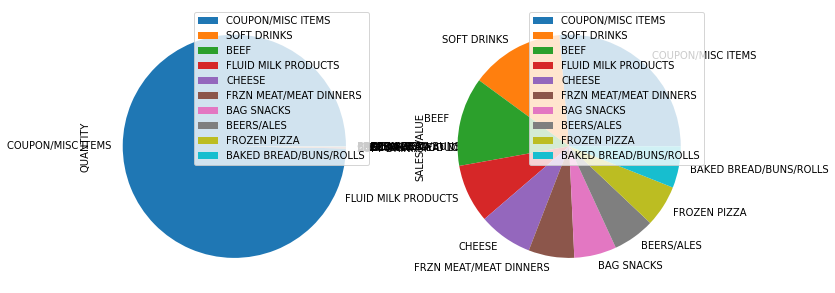

In [42]:
print("Your top 10 product categories are the following: ")
print("The 10 categories all together represent: " + str(round((top_10['SALES_VALUE'].sum() * 100)/ 8057463.08 ,2)) + "% -> $" + str(round(top_10['SALES_VALUE'].sum(), 2)))
plot3 = top_10.plot.pie(subplots=True, figsize=(11, 6))

In [114]:
top_10.head()

,COMMODITY_DESC,QUANTITY,SALES_VALUE
78,COUPON/MISC ITEMS,257218037,639878.56
273,SOFT DRINKS,160637,327647.30
25,BEEF,65576,312103.22
124,FLUID MILK PRODUCTS,116192,205356.05
52,CHEESE,96402,189528.18


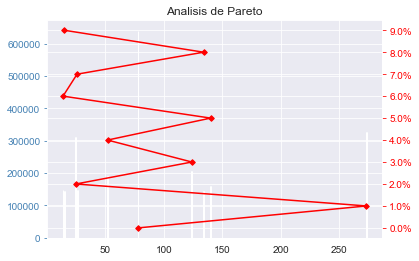

In [117]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(top_10.index, top_10['SALES_VALUE'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(top_10.index, top_10['COMMODITY_DESC'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

plt.title('Analisis de Pareto')
#display Pareto chart
plt.show()

In [43]:
# Send the data of the top categories to a csv
top_product_categories.to_csv("top_product_categories.csv")

### En conclusion:

El 80% de las ventas es representado pro un total de 96 categorias.

Este 80.13% repsenta un valor neto de $6,456,193.71 de ventas.

La data de las top categorias se encuentre en documento de tipo csv llamado top_product_categories.csv

Se podria hacer un analisis mas exhaustivo con relacion a la cantidad de productos por categoria.
